In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

**Importing the dataset**

In [60]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    15

In [61]:
df["Gender"]=df[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)
df.drop("User ID",axis=1,inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [62]:
features=df.drop("Purchased",axis=1)
target=df["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=5)


**Feature Scaling**

In [64]:
scaler=StandardScaler()
strain=scaler.fit_transform(x_test)
stest=scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [65]:
rfc=RandomForestClassifier(random_state=5)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=5)

**Predicting the Test set results**

In [66]:
pred_target=rfc.predict(x_test)
print('accuracy score:\n',accuracy_score(y_test,pred_target))

accuracy score:
 0.875


In [67]:
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

Age                0.525058
EstimatedSalary    0.464446
Gender             0.010496
dtype: float64

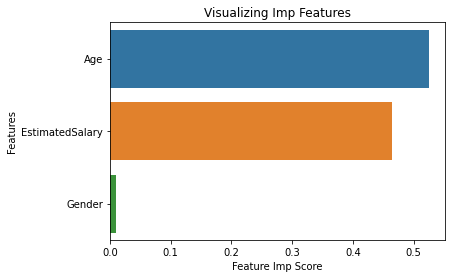

In [68]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Imp Score')
plt.ylabel('Features')
plt.title("Visualizing Imp Features")
plt.show()

**Making the Confusion Matrix**

confusion matrics:
 [[69  9]
 [ 6 36]]


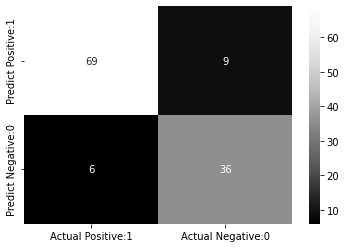

In [70]:
cfm=confusion_matrix(y_test,pred_target)
print("confusion matrics:\n",cfm)
cfm = pd.DataFrame(cfm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cfm, annot=True, cmap='Greys_r')

In [75]:
print(classification_report(y_test,pred_target))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        78
           1       0.80      0.86      0.83        42

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.86       120
weighted avg       0.88      0.88      0.88       120



**Visualising the Training set results**

Train set auc:
 0.875


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


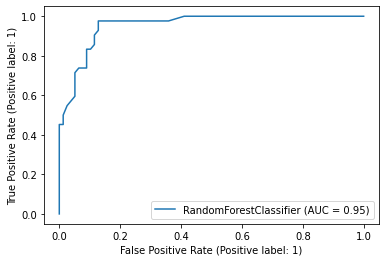

In [96]:
acc = accuracy_score(y_test, pred_target)
print("Train set auc:\n",acc)
plot_roc_curve(rfc, x_test, y_test)

**Visualising the Test set results**

In [102]:
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, pred_target)

Test set accuracy: 0.88


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored